# Dom's Notebook

hypothesis:

(01/09/20)
- Taxo ID [7,8] fall into Exec and consult
- taxo ID [3,4,5,9] fall into specialists
- Taxo ID [1,2,6] are further divided by experience level
        - we weren't satisfied on the results of this grouping

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
import wrangle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import ttest_ind


In [62]:
data = pd.read_excel('/Users/dom/codeup_data_science/capstone/kev/survey_responses.xlsx', )
data.head(2)

,q00,q01a,q01b,q01c,q02a,q02b,q02c,q02d,q02e,q02f,...,q14,q15,q16,q17a,q17b,q18a,q21,q22,q23,q09a
0,284,Academic,4,1.0,Often,Neutral,Never,Often,Often,Often,...,NaN,NaN,"CHI, INTERACT",depending on the professional values,7.0,"any, depending on the values",research-practice connections,NaN,research-practice connections,"sort of, psychology background."
1,288,Academic,4,1.0,Occasionally,Neutral,Occasionally,Often,Often,Often,...,"Content, cost, timing (can I get away at this ...","Dagstuhl workshop - small, intense, intimate g...",Hawaii international conference on Education,I would attend any of these,6.0,Multi-track: Every attendee chooses their own ...,NaN,NaN,Don’t create schedule conflicts with other rel...,"Yes, I was taught how to conduct research"


In [63]:
data_dictionary = pd.read_excel('../data_files/data_dictionary.xlsx')
data_dictionary.head()

,qid,column_name,is_required,from_orig_file,in_wrangle,char_type,function,data_type,encoder,survey_section,question_group,question_text
0,q00,resp_id,True,True,True,numeric,identification,int64,NaN,Survey,ID,Entry Id
1,q01a,job_title,True,True,True,text,categorical,category,NaN,Work,Position,Title
2,q01b,job_taxo,True,True,True,numeric,categorical,category,NaN,Work,Position,Job Taxo ID
3,q01c,job_id,False,True,True,numeric,categorical,category,NaN,Work,Position,Job ID
4,q02a,job_conduct_res,True,True,True,numeric,quantitative,int64,often5,Work,Research Duties,Conducting Research


In [64]:
data.rename(columns = data_dictionary[['qid','column_name']].set_index('qid').column_name, inplace=True)
data.head(2)

,resp_id,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,...,how_pick_events,best_event,events_attend_recent,ideal_conference_size,ideal_conference_size_cat_orig,ideal_structure,ideal_topics,ideal_attendees,recommendations,research_educ
0,284,Academic,4,1.0,Often,Neutral,Never,Often,Often,Often,...,NaN,NaN,"CHI, INTERACT",depending on the professional values,7.0,"any, depending on the values",research-practice connections,NaN,research-practice connections,"sort of, psychology background."
1,288,Academic,4,1.0,Occasionally,Neutral,Occasionally,Often,Often,Often,...,"Content, cost, timing (can I get away at this ...","Dagstuhl workshop - small, intense, intimate g...",Hawaii international conference on Education,I would attend any of these,6.0,Multi-track: Every attendee chooses their own ...,NaN,NaN,Don’t create schedule conflicts with other rel...,"Yes, I was taught how to conduct research"


In [65]:
df,_ = wrangle.wrangle_data()
df.head()

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,2,3,2,2,2,NaN,research-practice connections,NaN,research-practice connections,2
288,Academic,4,1.0,1,2,1,3,3,3,3,...,3,3,1,1,2,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2
294,Academic,4,1.0,3,3,1,3,1,3,3,...,2,2,2,2,2,NaN,NaN,NaN,Looking forward! \n,2
281,Academic,4,1.0,3,4,0,2,3,2,0,...,3,2,2,3,2,NaN,"Research design, innovative methods, communica...",NaN,NaN,2
280,Academic,4,1.0,3,3,0,1,1,3,2,...,3,2,1,2,2,You should consider the combination of confere...,NaN,NaN,NaN,2


- Checking freds nlp functions

In [66]:
# sys.path.append('../fred')
# import nlp

In [67]:
# mat, vect = nlp.create_tfidf_matrix(df.best_event)

#### Exploration

In [68]:
#dataframe
df.head(2)

,job_title,job_taxo,job_id,job_conduct_res,job_analyze_res,job_buy_res_report,job_manage_res_proj,job_observe_res,job_plan_res,job_teach_res,...,session_workshop,session_network,session_social_event,session_qa,sesson_topic_tables,other_conference_types,ideal_topics,ideal_attendees,recommendations,persona_id
resp_id,,,,,,,,,,,,,,,,,,,,,
284,Academic,4,1.0,3,2,0,3,3,3,3,...,2,3,2,2,2,NaN,research-practice connections,NaN,research-practice connections,2
288,Academic,4,1.0,1,2,1,3,3,3,3,...,3,3,1,1,2,NaN,NaN,NaN,Don’t create schedule conflicts with other rel...,2


In [69]:
#Quantitative columns
quant_cols = df.select_dtypes([int,float]).columns
quant_cols.to_list()

['job_conduct_res',
 'job_analyze_res',
 'job_buy_res_report',
 'job_manage_res_proj',
 'job_observe_res',
 'job_plan_res',
 'job_teach_res',
 'job_advocate_res',
 'job_hire_res_vendor',
 'job_lead_res_team',
 'exp_conduct_res',
 'exp_analyze_res',
 'exp_buy_res_report',
 'exp_manage_res_proj',
 'exp_observe_res',
 'exp_plan_res',
 'exp_teach_res',
 'exp_advocate_res',
 'exp_hire_res_vendor',
 'exp_lead_res_team',
 'learning_talks',
 'learning_read',
 'learning_meetup',
 'learning_workshop',
 'learning_conference',
 'likely_watch_video',
 'likely_internet',
 'likely_book',
 'likely_online_group',
 'likely_colleague',
 'likely_meetup',
 'likely_conference',
 'likely_workshop',
 'factor_speaker',
 'factor_diverse_speak',
 'factor_topics',
 'factor_format_sessions',
 'factor_size',
 'factor_network',
 'factor_variety_attend',
 'factor_code',
 'factor_location',
 'factor_ability_to_pay',
 'ideal_multi_track',
 'ideal_single_track',
 'ideal_unconference',
 'session_keynote',
 'session_long_

In [70]:
#Jobs by taxo id
    #1 is UX researchers
    #2 is Developers
    #3 is Researcher/Scientist
    #4 is Academic/Students
    #5 is Planners?
    #6 is Design/Research Managers
    #7 is Consultans
    #8 is Executive
    #9 is misc
data.groupby(['job_taxo', 'job_title']).job_title.count()

job_taxo  job_title              
1         Principal UX Researcher     44
          Senior UX Researcher        97
          UX Researcher              202
2         Principal UX Designer       28
          Senior UX Designer          25
          UX Designer                 87
3         Analyst                      5
          Anthropologist               3
          Behavioral economist         1
          Ethnographer                 1
          Market Researcher            4
          Research Scientist           1
          Researcher                   9
4         Academic                    23
          Student                      5
5         Content Strategist           4
          Engineer                    14
          Information Architect       11
          Product Manager             10
          Service Designer            10
          Strategist                  25
6         Design Manager              65
          Research Manager            70
7         Consultant   

In [71]:
df.groupby(['persona_id','job_taxo']).persona_id.count()

persona_id  job_taxo
1           7            49
            8            45
2           3            23
            4            23
            5            65
            9            12
3           1            87
            2            21
            6            72
4           1           162
            2            61
            6            38
5           1            38
            2            27
            6             3
Name: persona_id, dtype: int64

In [72]:
df.persona_id.value_counts()

4    261
3    180
2    123
1     94
5     68
Name: persona_id, dtype: int64

In [73]:
exp_cols = ['exp_conduct_res', 'exp_analyze_res',
           'exp_buy_res_report', 'exp_manage_res_proj', 'exp_observe_res',
           'exp_plan_res', 'exp_teach_res', 'exp_advocate_res',
           'exp_hire_res_vendor', 'exp_lead_res_team']
df[exp_cols].mean(axis = 1)

resp_id
284    5.0
288    4.7
294    3.6
281    0.6
280    2.0
      ... 
869    0.6
879    1.0
136    2.4
74     1.5
2      1.3
Length: 726, dtype: float64

In [74]:
#show distributions of values


In [156]:
#establish features and target and split train and test data
df['target'] = df[['learning_conference','likely_conference']].apply('mean', axis = 1)

x = quant_cols.drop(['likely_conference','learning_conference']).to_list()+['persona_id', 'job_taxo']
y = 'target'
train, test = train_test_split(df[x+[y]].dropna(subset = [y]))

In [157]:
#1/14/20
#use svm or 
#form hypothesis and test them

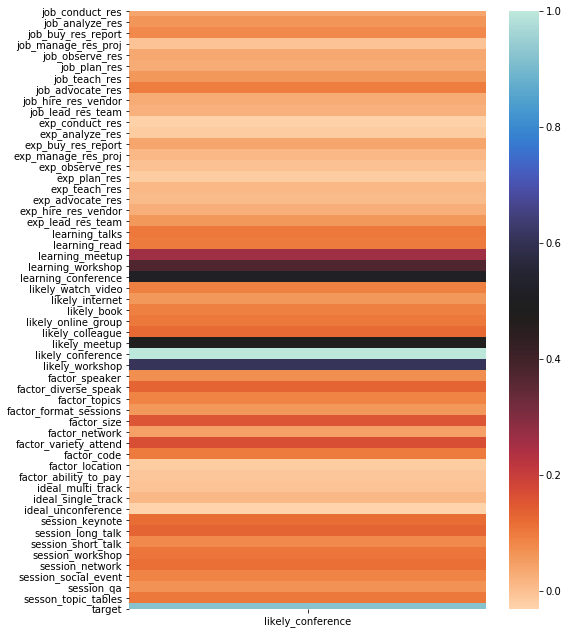

In [158]:
plt.figure(figsize=(8,11))
sns.heatmap(df.corr()[['likely_conference']], cmap = 'icefire_r')
plt.show()

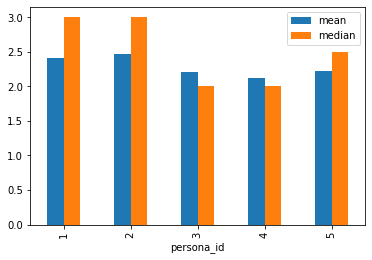

persona_id
1     94
2    123
3    180
4    261
5     68
Name: likely_conference, dtype: int64

In [159]:
df.groupby('persona_id').likely_conference.agg(['mean', 'median']).plot.bar()
plt.show()
df.groupby('persona_id').likely_conference.count()

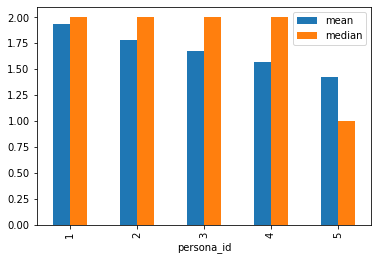

In [160]:
df.groupby('persona_id').learning_conference.agg(['mean', 'median']).plot.bar()
plt.show()


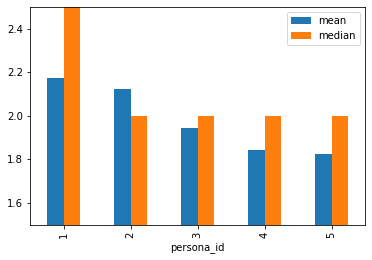

persona_id
1     94
2    123
3    180
4    261
5     68
Name: target, dtype: int64

In [161]:
df.groupby('persona_id').target.agg(['mean', 'median']).plot.bar()
plt.ylim(1.5,2.5)
plt.show()
df.groupby('persona_id').target.count()


Text(0.5, 1, 'Statistical difference between persona groups of likelyhood to attend a conference')

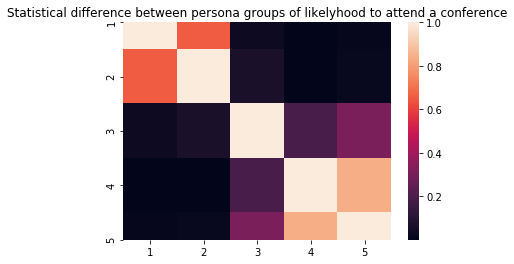

In [162]:
ttests = {}
row = {}
for i in range(1,6):
    for j in range(1,6):
        ttests[j] = ttest_ind(df[df.persona_id == i].target,df[(df.persona_id == j)].target, nan_policy='omit')[1]
    row[i] = ttests.copy()
sns.heatmap(pd.DataFrame(row))
plt.title('Statistical difference between persona groups of likelyhood to attend a conference')

In [163]:
pd.DataFrame(row)

,1,2,3,4,5
1,1.000000,0.659110,0.034562,0.000751,0.014948
2,0.659110,1.000000,0.070684,0.001597,0.023369
3,0.034562,0.070684,1.000000,0.192902,0.309731
4,0.000751,0.001597,0.192902,1.000000,0.842880
5,0.014948,0.023369,0.309731,0.842880,1.000000


In [197]:
tree = DecisionTreeRegressor(max_depth=1000, random_state=123)
tree.fit(train[x], train[y])
predicted = tree.predict(test[x]) 


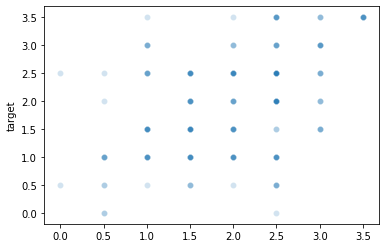

In [198]:
sns.scatterplot(predicted, test[y], alpha=.2)

In [194]:
reg = LinearRegression()
reg.fit(train[x], train[y])
predicted = reg.predict(test[x])

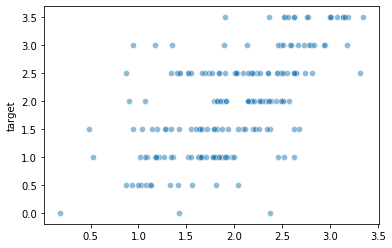

In [195]:
sns.scatterplot(predicted, test[y],alpha = .5)

# MVP Model

In [30]:
df_mvp = df[['job_taxo', 'persona_id', 'num_employees']].join(pd.DataFrame(df[['exp_conduct_res', 'exp_analyze_res',
       'exp_buy_res_report', 'exp_manage_res_proj', 'exp_observe_res',
       'exp_plan_res', 'exp_teach_res', 'exp_advocate_res',
       'exp_hire_res_vendor', 'exp_lead_res_team']].apply(max, axis = 1), columns = ['experience']),).dropna()

In [31]:
df_mvp_ohe = pd.get_dummies(df_mvp, columns=['job_taxo']) 

In [32]:
x = df_mvp_ohe.drop(columns=['persona_id']).columns.to_list()
y = 'persona_id'
train, test = train_test_split(df_mvp_ohe, random_state = 123, stratify = df_mvp_ohe.persona_id)

In [33]:
classifier = SVC(random_state=123)
classifier.fit(train[x], train[y])
predicted = classifier.predict(test[x])

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
print(classification_report(test[y], predicted))
pd.crosstab(test[y], predicted)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        17

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



col_0,1,2,3,4,5
persona_id,,,,,
1,23,0,0,0,0
2,0,31,0,0,0
3,0,0,45,0,0
4,0,0,0,65,0
5,0,0,0,0,17


In [35]:
tree = DecisionTreeClassifier()
tree.fit(train[x], train[y])
predicted = tree.predict(test[x]) 

In [36]:
print(classification_report(test[y], predicted))
pd.crosstab(test[y], predicted)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        65
           5       1.00      1.00      1.00        17

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



col_0,1,2,3,4,5
persona_id,,,,,
1,23,0,0,0,0
2,0,31,0,0,0
3,0,0,45,0,0
4,0,0,0,65,0
5,0,0,0,0,17
